In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




Using TensorFlow backend.


In [3]:
#Get the stock quote
df = web.DataReader('YESBANK.NS', data_source='yahoo', start='2014-01-01', end='2020-03-16')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-01,75.160004,74.220001,74.599998,74.889999,6697155.0,58.173923
2014-01-02,76.360001,72.040001,75.000000,72.430000,30635905.0,56.263023
2014-01-03,74.290001,71.599998,71.599998,73.959999,19839425.0,57.451515
2014-01-06,74.129997,72.419998,74.059998,73.279999,15155620.0,56.923298
2014-01-07,73.779999,71.860001,73.199997,73.029999,24125140.0,56.729088
...,...,...,...,...,...,...
2020-03-11,29.600000,23.350000,23.350000,28.799999,413642132.0,28.799999
2020-03-12,28.700001,17.450001,28.700001,25.049999,337764206.0,25.049999
2020-03-13,27.700001,21.350000,22.549999,25.549999,276659418.0,25.549999


In [4]:
df.shape

(1525, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


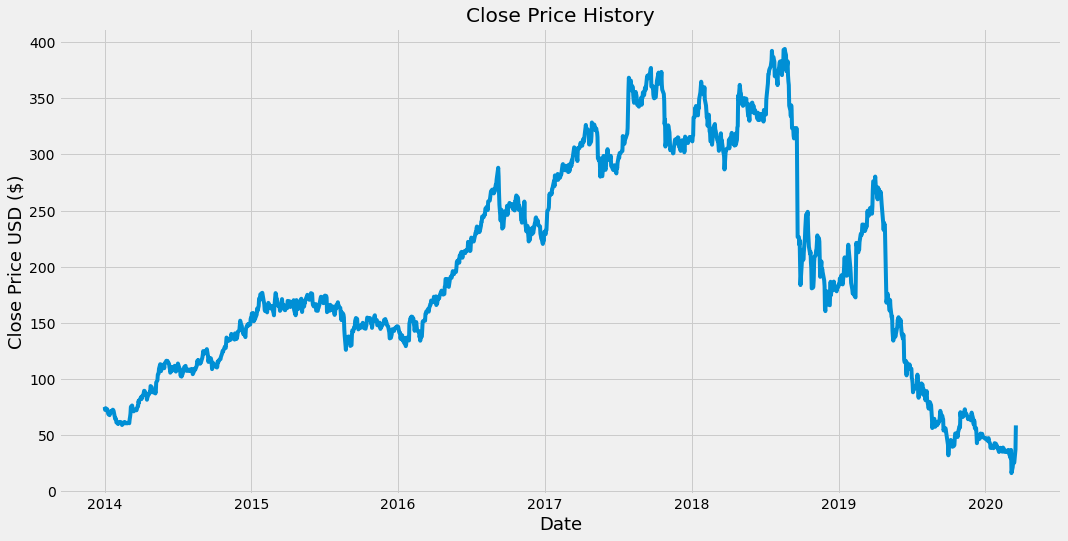

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1220

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15545851],
       [0.148948  ],
       [0.15299722],
       ...,
       [0.0248776 ],
       [0.05544528],
       [0.1124785 ]])

In [8]:
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.15545851, 0.148948  , 0.15299722, 0.15119756, 0.15053592,
       0.14590446, 0.14259627, 0.13881169, 0.13656213, 0.14071722,
       0.14413127, 0.14598385, 0.14312559, 0.14749238, 0.14950377,
       0.14857748, 0.1464867 , 0.14148472, 0.12751092, 0.12923119,
       0.12706101, 0.11941247, 0.12010057, 0.11576022, 0.117851  ,
       0.11766574, 0.1186979 , 0.1207622 , 0.12017997, 0.119386  ,
       0.1176922 , 0.1133254 , 0.1163954 , 0.11877729, 0.12012704,
       0.11973005, 0.11705704, 0.11933307, 0.11811565, 0.11724229,
       0.11737462, 0.11867144, 0.11750695, 0.12687574, 0.13269816,
       0.14029378, 0.15622602, 0.15940187, 0.15376472, 0.1503242 ,
       0.14852454, 0.14561333, 0.14976842, 0.15066826, 0.14889507,
       0.14799524, 0.15797273, 0.15815801, 0.16990869, 0.165833  ])]
[0.1715760319517064]



In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1160, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1160/1160 [==============================] - 263s 226ms/step - loss: 0.0043


In [0]:
test_data = scaled_data[training_data_len - 120: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

ValueError: ignored

In [20]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=10)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

ValueError: ignored

In [0]:
valid

In [0]:
apple_quote = web.DataReader('ASHOKLEY.NS', data_source='yahoo', start='2014-01-01', end='2020-02-14')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)